In [1]:
# load necessary libraries
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load uber dataset with location id and a lookup dataset with location names
df_uber_trips = pd.read_csv('daily_trips_with_location_id(09-14).csv')
df_borough = pd.read_csv('loc_borough.csv')

# load uber dataset from April 2014 - September 2014
uber_raw_apr14 = pd.read_csv('uber-raw-data-apr14.csv')
uber_raw_may14 = pd.read_csv('uber-raw-data-may14.csv')
uber_raw_jun14 = pd.read_csv('uber-raw-data-jun14.csv')
uber_raw_jul14 = pd.read_csv('uber-raw-data-jul14.csv')
uber_raw_aug14 = pd.read_csv('uber-raw-data-aug14.csv')
uber_raw_sep14 = pd.read_csv('uber-raw-data-sep14.csv')

## Data Preperation and Cleaning

### Preparing and cleaning data, to get location for each trip

In [3]:
df_uber_trips.shape

(1919487, 4)

In [4]:
df_uber_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1919487 entries, 0 to 1919486
Data columns (total 4 columns):
car_type              object
date                  object
pickup_location_id    float64
trips                 int64
dtypes: float64(1), int64(1), object(2)
memory usage: 58.6+ MB


### Analyse dataset of uber trips

In [5]:
# drop na values on uber trips dataset
df_uber_trips.dropna(inplace=True)

In [6]:
# rename column pickup_location_id to location_id for ease of use
df_uber_trips.rename(columns={'pickup_location_id': 'location_id'}, inplace=True)

In [7]:
# change location id datatype to int
df_uber_trips['location_id'] = df_uber_trips['location_id'].astype(int)

In [8]:
df_uber_trips.head()

,car_type,date,location_id,trips
0,yellow,2009-01-01,1,37
1,yellow,2009-01-01,2,11
2,yellow,2009-01-01,4,1781
3,yellow,2009-01-01,6,5
4,yellow,2009-01-01,7,1226


### Analyse dataset for boroughs

In [9]:
df_borough.shape

(263, 3)

In [10]:
df_borough.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
locationid    263 non-null int64
zone          263 non-null object
borough       263 non-null object
dtypes: int64(1), object(2)
memory usage: 6.2+ KB


In [11]:
df_borough.head()

,locationid,zone,borough
0,1,Newark Airport,EWR
1,2,Jamaica Bay,Queens
2,3,Allerton/Pelham Gardens,Bronx
3,4,Alphabet City,Manhattan
4,5,Arden Heights,Staten Island


### Join uber trips dataset with borough dataset

In [12]:
# perform the join on location_id
df_loc = df_borough.join(df_uber_trips, on='locationid')

In [13]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
locationid     263 non-null int64
zone           263 non-null object
borough        263 non-null object
car_type       262 non-null object
date           262 non-null object
location_id    262 non-null float64
trips          262 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.5+ KB


In [14]:
# drop na values
df_loc.dropna(inplace=True)

In [15]:
df_loc.drop(columns='location_id', inplace=True)

In [16]:
# change datatype of trips from float to int
df_loc['trips'] = df_loc['trips'].astype(int)

In [17]:
# rearrange the columns
df_loc = df_loc[['locationid', 'date', 'car_type', 'zone', 'borough', 'trips']]

In [18]:
df_loc.head()

,locationid,date,car_type,zone,borough,trips
0,1,2009-01-01,yellow,Newark Airport,EWR,11
1,2,2009-01-01,yellow,Jamaica Bay,Queens,1781
2,3,2009-01-01,yellow,Allerton/Pelham Gardens,Bronx,5
3,4,2009-01-01,yellow,Alphabet City,Manhattan,1226
4,5,2009-01-01,yellow,Arden Heights,Staten Island,6


In [19]:
# save the dataset to a .csv file
df_loc.to_csv('df_loc.csv', encoding='utf-8', index=False)

### Analyse the uber trips data from April 2014 - September 2014

In [20]:
# combine dataset of 6 months into 1 dataset
uber_2014 = [uber_raw_apr14, uber_raw_may14, uber_raw_jun14, uber_raw_jul14,uber_raw_aug14, uber_raw_sep14]
df_uber_2014 = pd.concat(uber_2014,axis=0,ignore_index=True)

In [21]:
# split data/time to necessary columns
df_uber_2014.Timestamp = pd.to_datetime(df_uber_2014['Date/Time'],format='%m/%d/%Y %H:%M:%S') 
df_uber_2014['Date'] = df_uber_2014.Timestamp.dt.date
df_uber_2014['Month'] = df_uber_2014.Timestamp.dt.month
df_uber_2014['Year'] = df_uber_2014.Timestamp.dt.year
df_uber_2014['DayOfWeekNum'] = df_uber_2014.Timestamp.dt.dayofweek
df_uber_2014['DayOfWeek'] = df_uber_2014.Timestamp.dt.weekday_name
df_uber_2014['MonthDayNum'] = df_uber_2014.Timestamp.dt.day
df_uber_2014['HourOfDay'] = df_uber_2014.Timestamp.dt.hour

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [22]:
# rearrange columns
df_uber_2014 = df_uber_2014[['Base', 'Date/Time', 'Lat', 'Lon', 'Year', 'Month', 'Date', 'DayOfWeek',
                                'MonthDayNum', 'HourOfDay']]

In [23]:
df_uber_2014.shape

(4534327, 10)

In [24]:
df_uber_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 10 columns):
Base           object
Date/Time      object
Lat            float64
Lon            float64
Year           int64
Month          int64
Date           object
DayOfWeek      object
MonthDayNum    int64
HourOfDay      int64
dtypes: float64(2), int64(4), object(4)
memory usage: 345.9+ MB


In [25]:
df_uber_2014.head()

,Base,Date/Time,Lat,Lon,Year,Month,Date,DayOfWeek,MonthDayNum,HourOfDay
0,B02512,4/1/2014 0:11:00,40.7690,-73.9549,2014,4,2014-04-01,Tuesday,1,0
1,B02512,4/1/2014 0:17:00,40.7267,-74.0345,2014,4,2014-04-01,Tuesday,1,0
2,B02512,4/1/2014 0:21:00,40.7316,-73.9873,2014,4,2014-04-01,Tuesday,1,0
3,B02512,4/1/2014 0:28:00,40.7588,-73.9776,2014,4,2014-04-01,Tuesday,1,0
4,B02512,4/1/2014 0:33:00,40.7594,-73.9722,2014,4,2014-04-01,Tuesday,1,0


## Data Visualization

### Trips of yellow taxi to different boroughs of New York

In [26]:
car_trips = df_loc.groupby('borough')['trips'].count().sort_values(ascending=False)
trips = car_trips[car_trips > 1]
trips

borough
Queens           69
Manhattan        68
Brooklyn         61
Bronx            43
Staten Island    20
Name: trips, dtype: int64

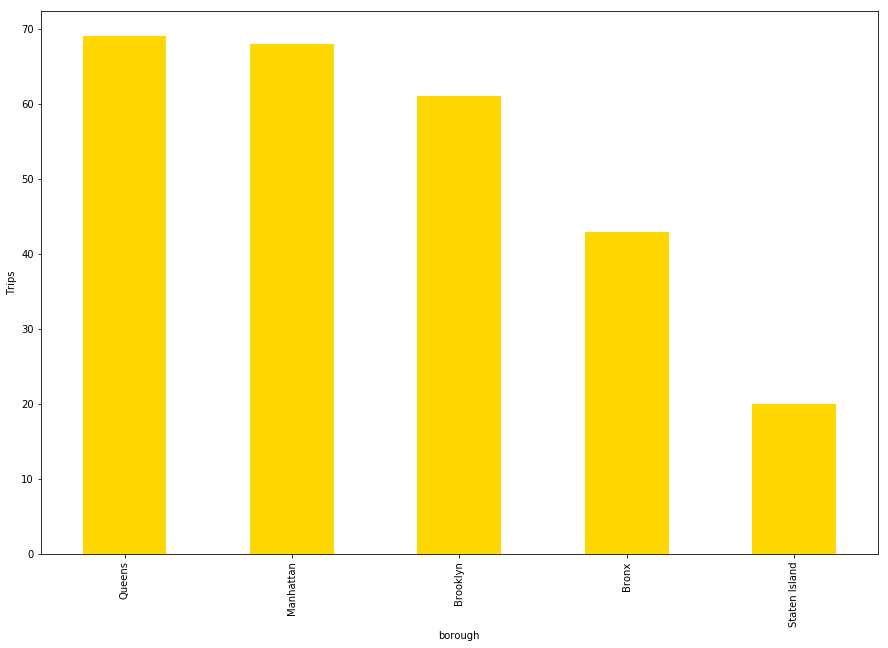

In [27]:
plt.figure(figsize=(15,10))
plt.ylabel('Trips')
trips.plot(kind='bar', color='gold')
plt.show()

#### We can see most trips were to Queens followed by Manhattan. 

### Trips by Week Days

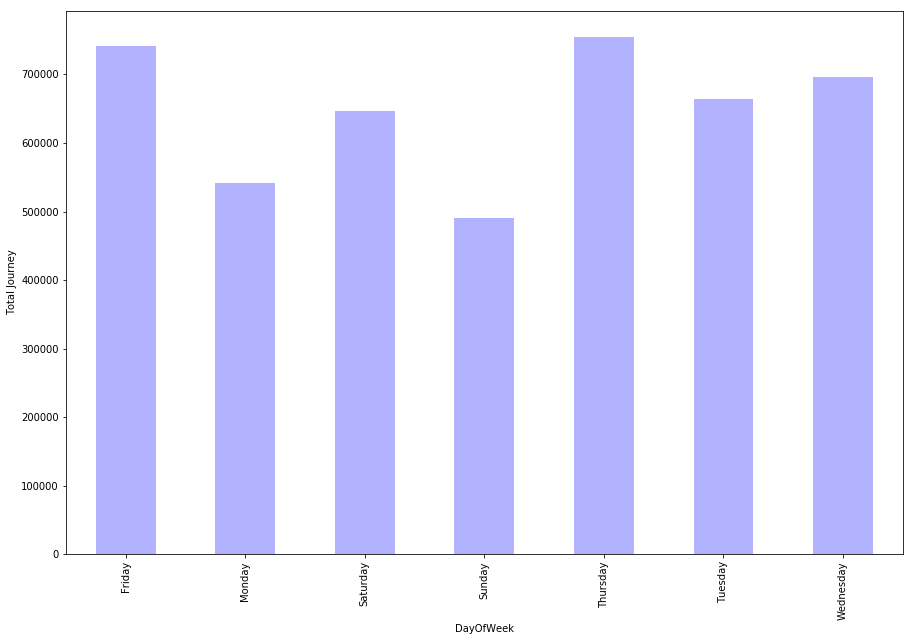

In [28]:
trips_days = df_uber_2014.groupby('DayOfWeek')['Month'].count()

plt.figure(figsize=(15, 10))
trips_days.plot(kind='bar', color='b', alpha=0.3)
plt.ylabel('Total Journey')
plt.show()

### Trips by hour

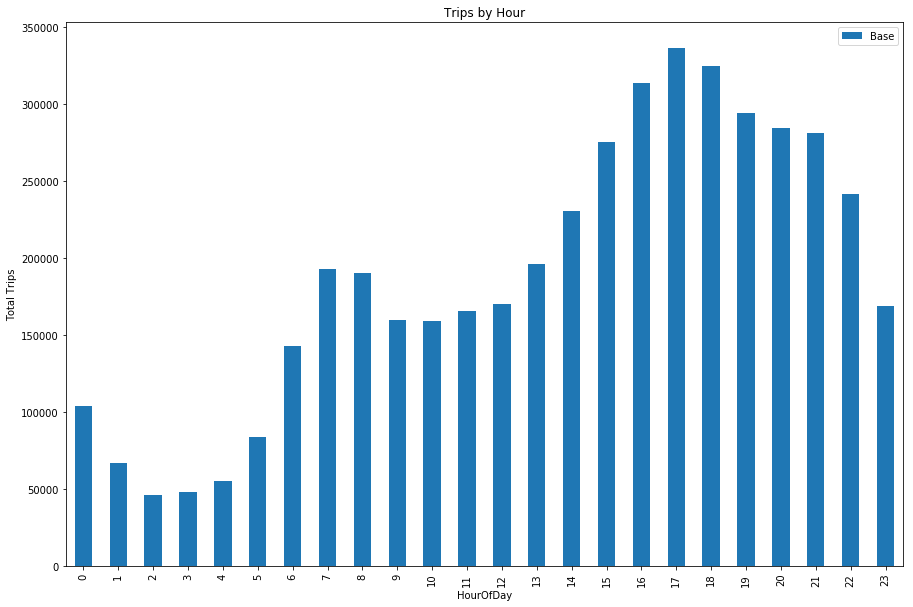

In [29]:
trips_hour = df_uber_2014.pivot_table(index=['HourOfDay'], values='Base',aggfunc='count')

trips_hour.plot(kind='bar', figsize=(15,10))
plt.ylabel('Total Trips')
plt.title('Trips by Hour');

### Trips from April - September

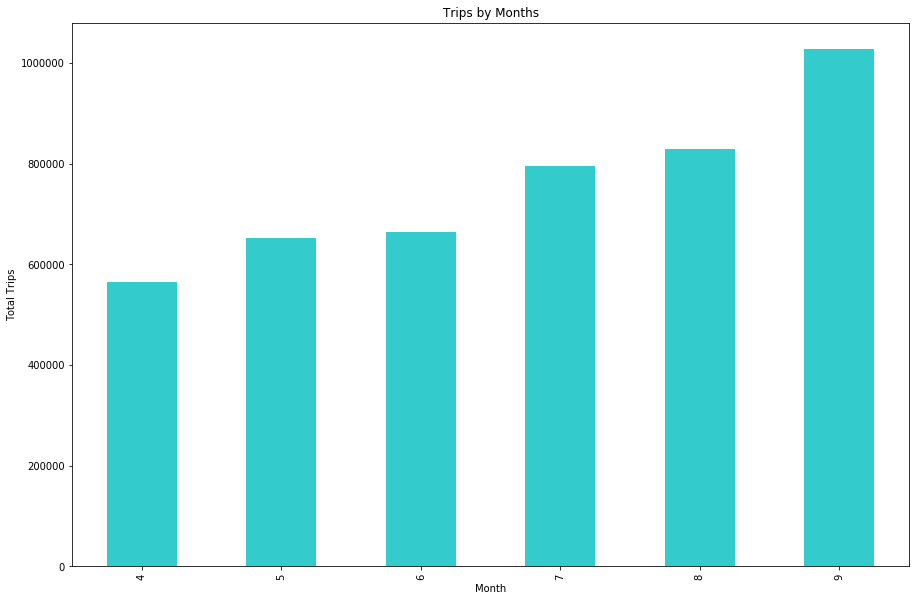

In [30]:
trips_month = df_uber_2014.groupby('Month')['Year'].count()

plt.figure(figsize=(15, 10))
trips_month.plot(kind='bar', color='c', alpha=0.8)
plt.ylabel('Total Trips')
plt.title('Trips by Months');
plt.show()

## Plotting 4 millions uber trips 

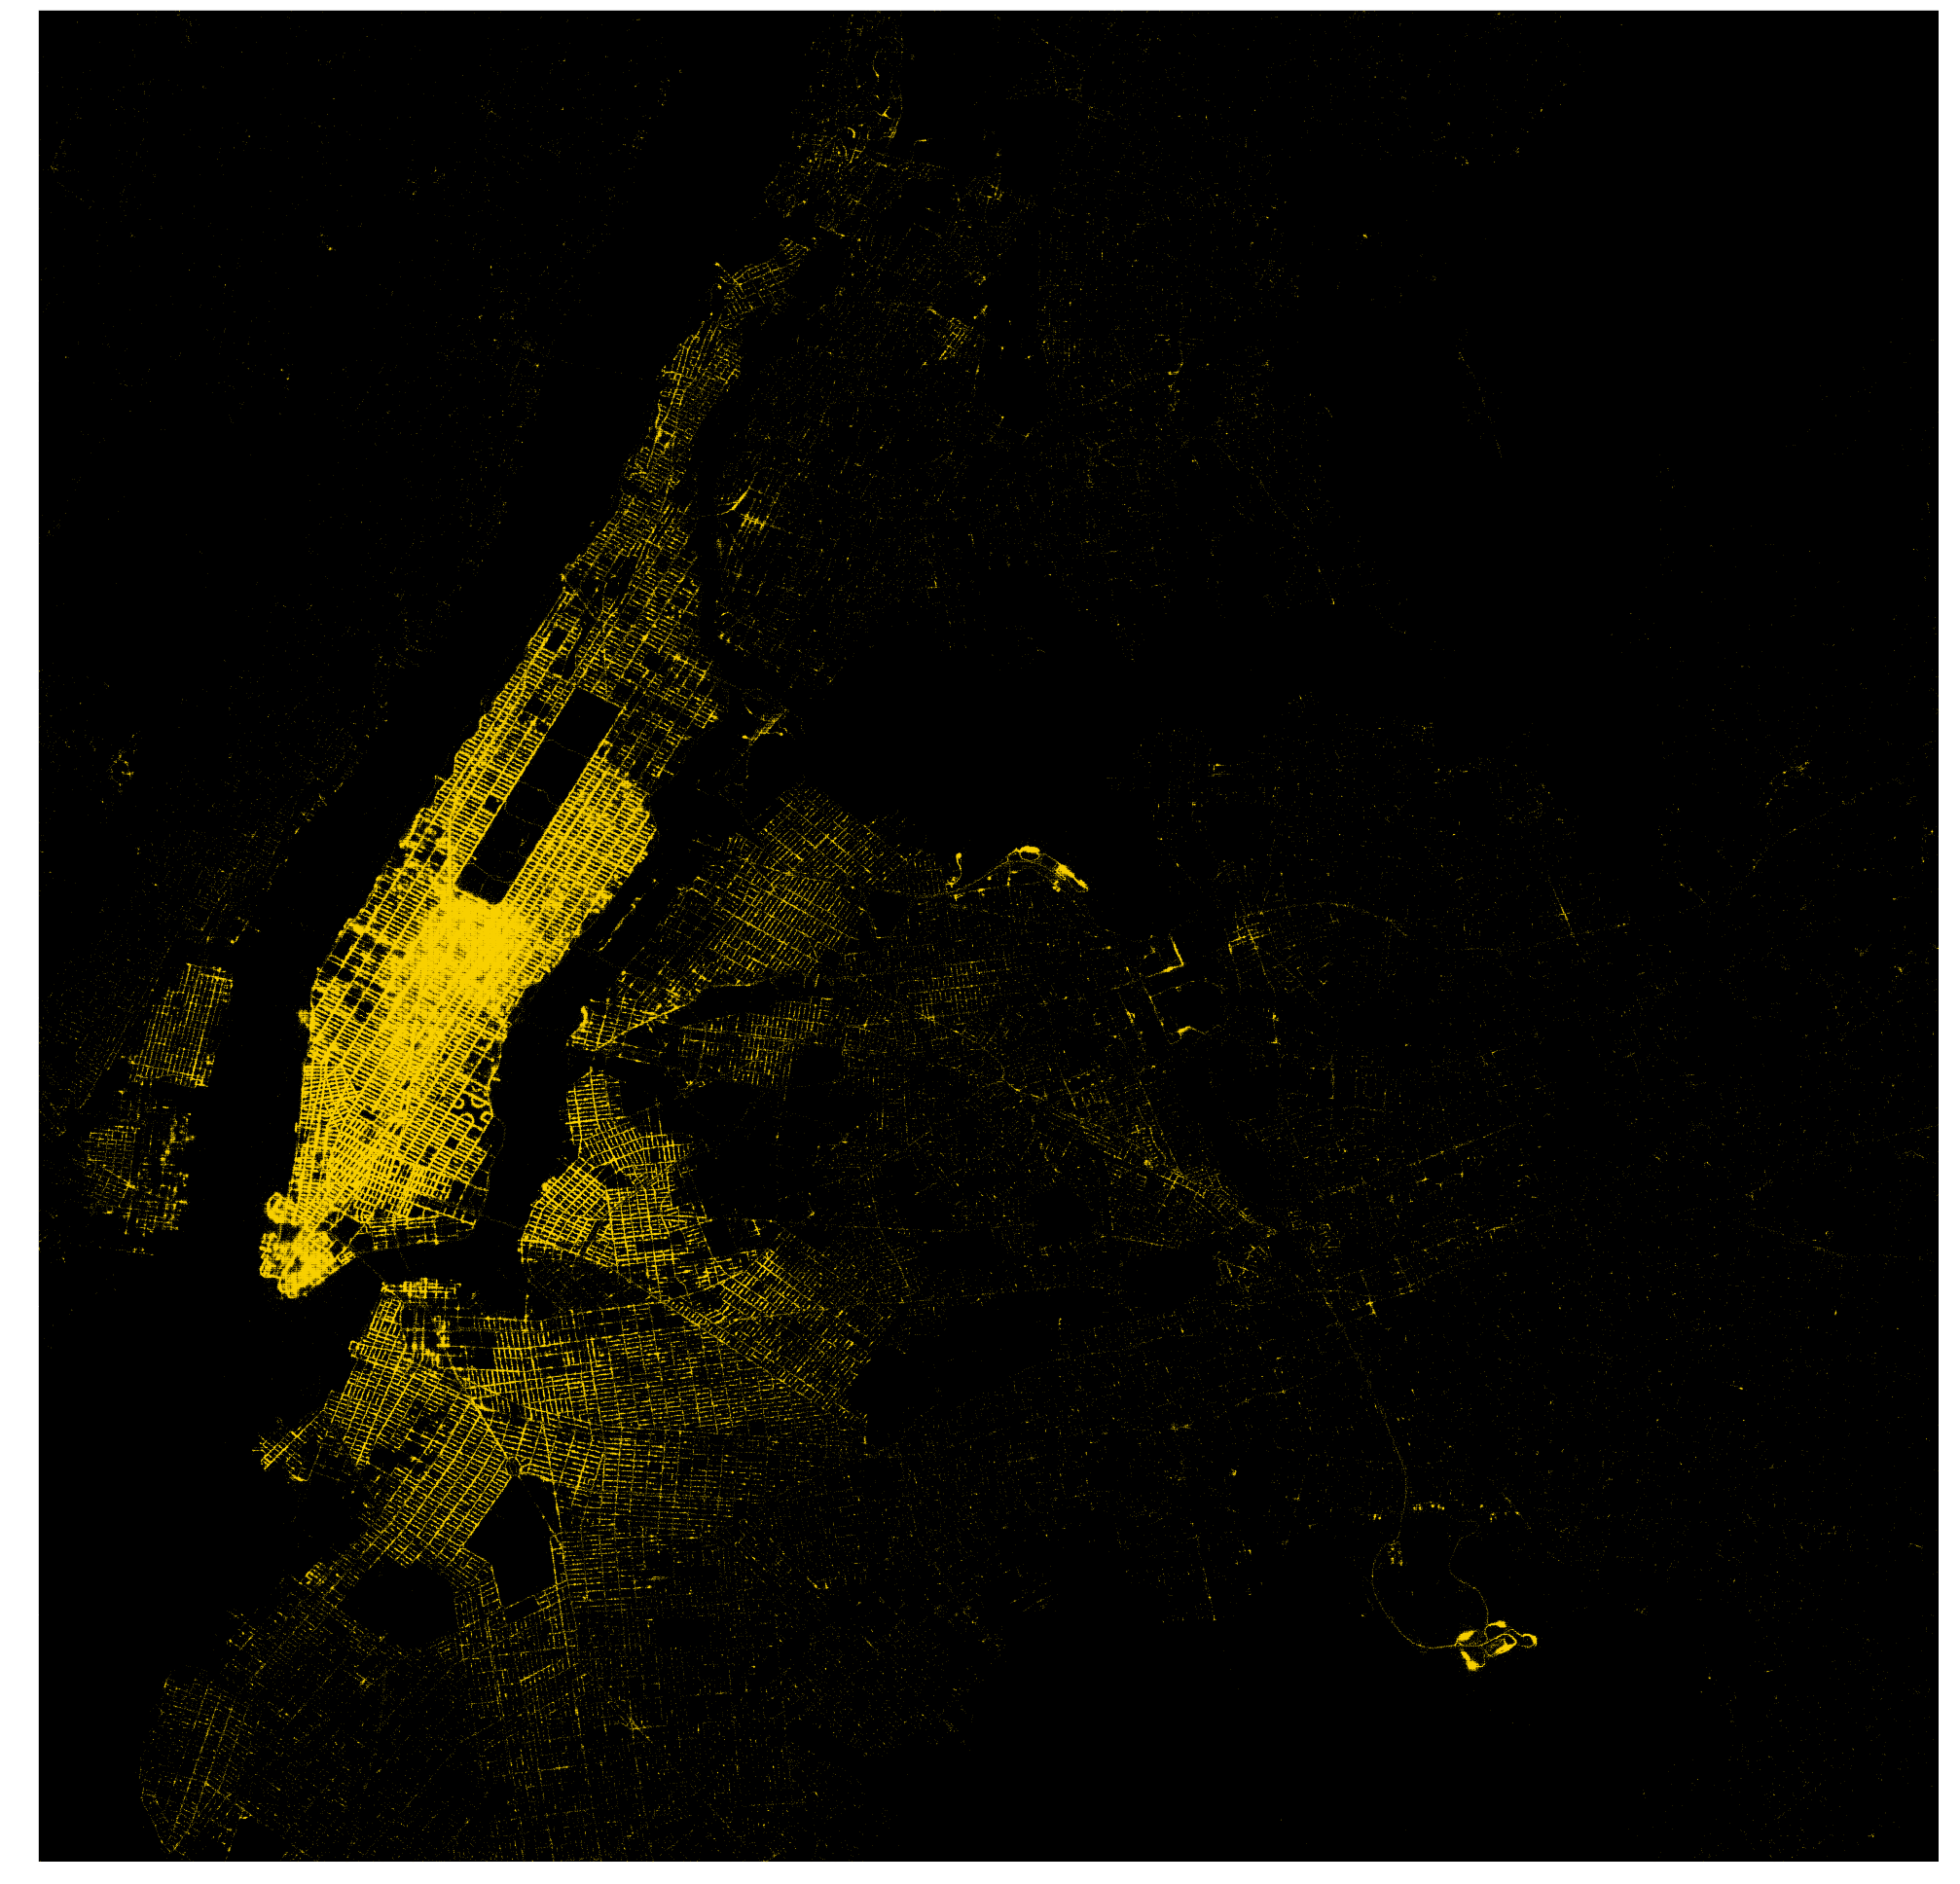

In [31]:
plt.figure(figsize=(35, 35))
plt.figure.dpi = 250
plt.style.use('dark_background')
plt.xlim([-74.06,-73.7])
plt.ylim([40.61, 40.91])
sns.set_style("darkgrid", {'axes.grid' : False})
plt.scatter(np.array(df_uber_2014['Lon']), np.array(df_uber_2014['Lat']), color='gold', s=0.01, alpha=0.5)
plt.show();